In [12]:
# 1. Imports & Loading Dataset
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')

from datetime import date ,datetime, timedelta

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
import sklearn.metrics as metrics 
from xgboost import XGBRegressor , plot_importance
from sklearn.ensemble import RandomForestRegressor 



In [2]:
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv(r'C:\Users\eslam\Desktop\TLC\2017_Yellow_Taxi_Trip_Data.csv')
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 14:53,04/11/2017 15:19,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 13:17,05/07/2017 13:48,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 19:04,05/03/2017 20:03,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 16:17,02/04/2017 16:29,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 15:20,11/10/2017 15:40,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


# 2.Data Exploration (Initial EDA and data cleaning)


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [13]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,22699.0,NaN,NaN,NaN,56758486.171285,32744929.492148,12127.0,28520556.0,56731504.0,85374524.0,113486300.0
VendorID,22699.0,NaN,NaN,NaN,1.556236,0.496838,1.0,1.0,2.0,2.0,2.0
tpep_pickup_datetime,22699,22435,02/01/2017 21:08,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tpep_dropoff_datetime,22699,22451,11/10/2017 19:33,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passenger_count,22699.0,NaN,NaN,NaN,1.642319,1.285231,0.0,1.0,1.0,2.0,6.0
trip_distance,22699.0,NaN,NaN,NaN,2.913313,3.653171,0.0,0.99,1.61,3.06,33.96
RatecodeID,22699.0,NaN,NaN,NaN,1.043394,0.708391,1.0,1.0,1.0,1.0,99.0
store_and_fwd_flag,22699,2,N,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PULocationID,22699.0,NaN,NaN,NaN,162.412353,66.633373,1.0,114.0,162.0,233.0,265.0
DOLocationID,22699.0,NaN,NaN,NaN,161.527997,70.139691,1.0,112.0,162.0,233.0,265.0


In [14]:
#check missing values 
df.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [22]:
#comvert pickup & dropoff columns to datetime 
df[['tpep_pickup_datetime','tpep_dropoff_datetime']].dtypes

tpep_pickup_datetime     object
tpep_dropoff_datetime    object
dtype: object

In [27]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'] )
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'] )
df[['tpep_pickup_datetime','tpep_dropoff_datetime']].dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
dtype: object

In [31]:
#create duration column
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')
df['trip_duration'].describe()

count    22699.000000
mean        17.010830
std         61.996458
min        -17.000000
25%          6.750000
50%         11.000000
75%         18.258333
max       1440.000000
Name: trip_duration, dtype: float64

In [39]:
#check outliers
round(df.describe(include= [np.number], percentiles= [.5]).T, 1)


,count,mean,std,min,50%,max
Unnamed: 0,22699.0,56758486.2,32744929.5,12127.0,56731504.0,113486300.0
VendorID,22699.0,1.6,0.5,1.0,2.0,2.0
passenger_count,22699.0,1.6,1.3,0.0,1.0,6.0
trip_distance,22699.0,2.9,3.7,0.0,1.6,34.0
RatecodeID,22699.0,1.0,0.7,1.0,1.0,99.0
PULocationID,22699.0,162.4,66.6,1.0,162.0,265.0
DOLocationID,22699.0,161.5,70.1,1.0,162.0,265.0
payment_type,22699.0,1.3,0.5,1.0,1.0,4.0
fare_amount,22699.0,13.0,13.2,-120.0,9.5,1000.0
extra,22699.0,0.3,0.5,-1.0,0.0,4.5


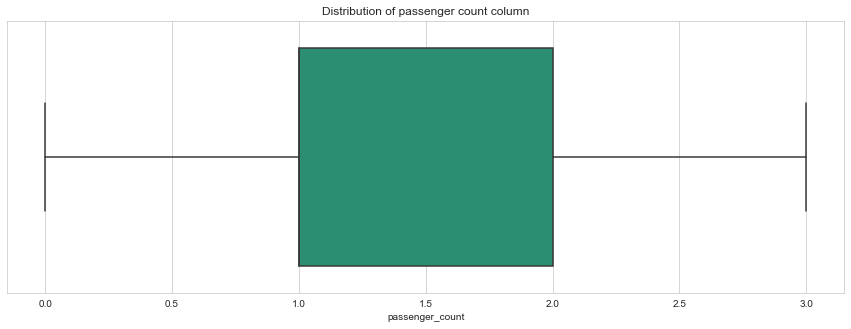

In [43]:
#box plot 
sns.set_style('whitegrid')
sns.set_palette('Dark2')

plt.figure(figsize = (15,5))
sns.boxplot(data=df , x='passenger_count',showfliers=False )
plt.title('Distribution of passenger count column')
plt.show()

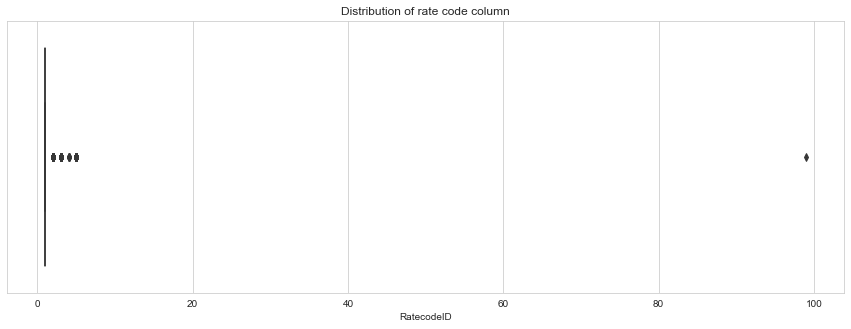

In [45]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df , x='RatecodeID',showfliers=True)
plt.title('Distribution of rate code column')
plt.show()

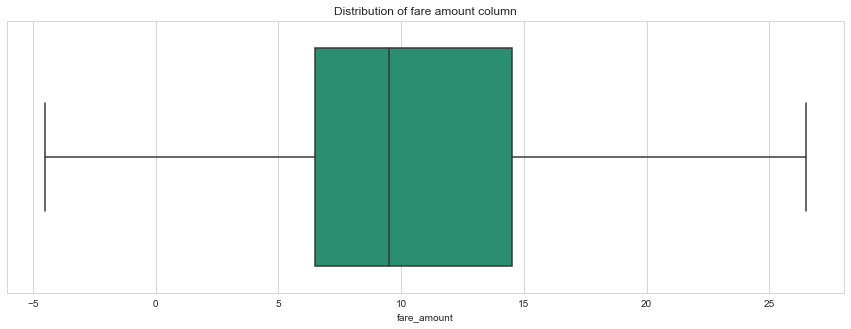

In [46]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df , x='fare_amount',showfliers=False)
plt.title('Distribution of fare amount column')
plt.show()

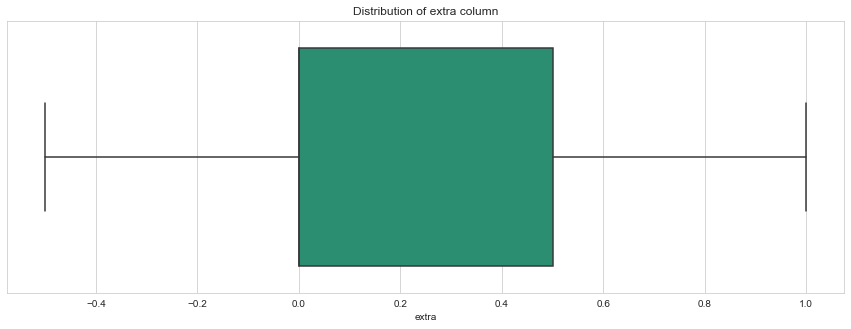

In [47]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df , x='extra',showfliers=False)
plt.title('Distribution of extra column')
plt.show()

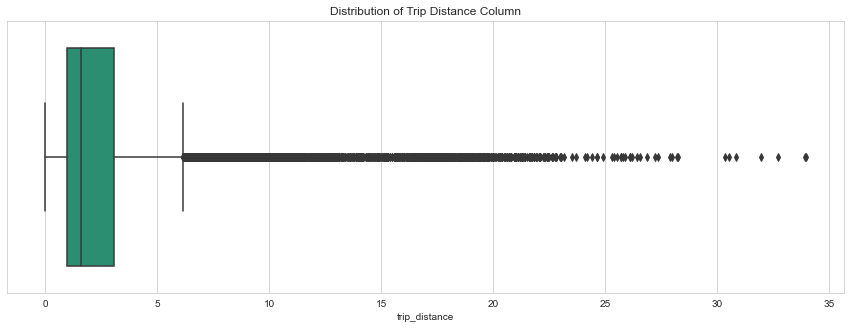

In [48]:
plt.figure(figsize = (15, 5))
sns.boxplot(data= df, x= "trip_distance", showfliers= True)
plt.title("Distribution of Trip Distance Column")
plt.show()

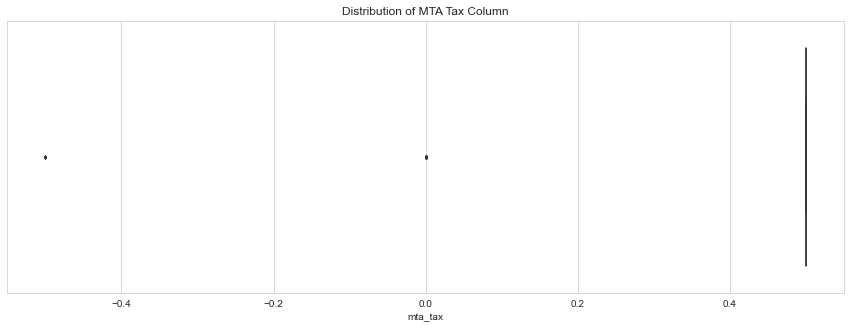

In [49]:
plt.figure(figsize = (15, 5))
sns.boxplot(data= df, x= "mta_tax", showfliers= True, fliersize= 2)
plt.title("Distribution of MTA Tax Column")
plt.show()

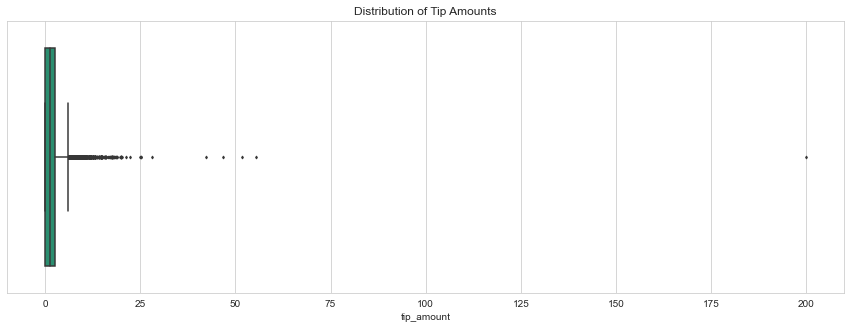

In [51]:
plt.figure(figsize = (15, 5))
sns.boxplot(data= df, x= "tip_amount", showfliers= True, fliersize= 2)
plt.title("Distribution of Tip Amounts")
plt.show()

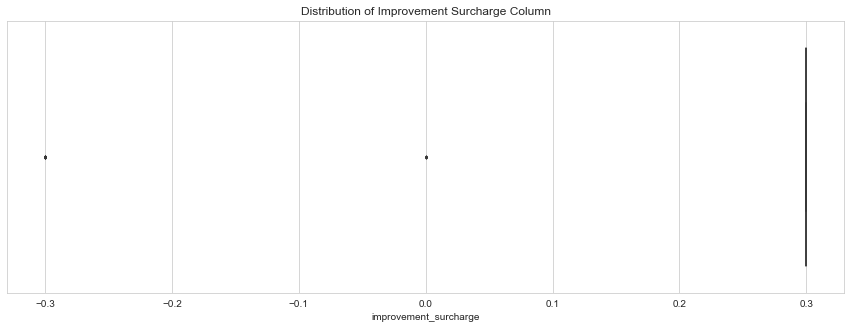

In [52]:
plt.figure(figsize = (15, 5))
sns.boxplot(data= df, x= "improvement_surcharge", showfliers= True, fliersize= 2)
plt.title("Distribution of Improvement Surcharge Column")
plt.show()


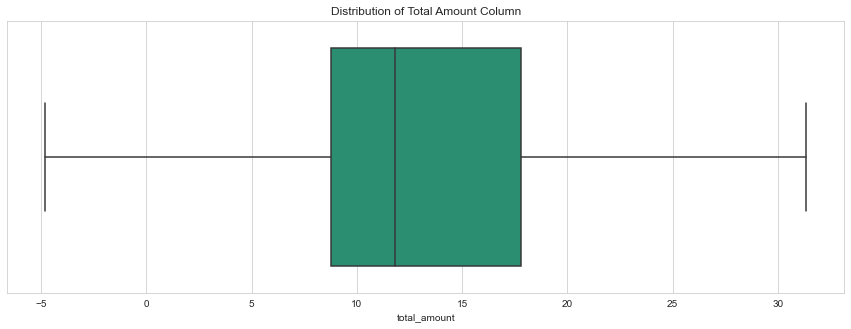

In [53]:
plt.figure(figsize = (15, 5))
sns.boxplot(data= df, x= "total_amount", showfliers= False)
plt.title("Distribution of Total Amount Column")
plt.show()

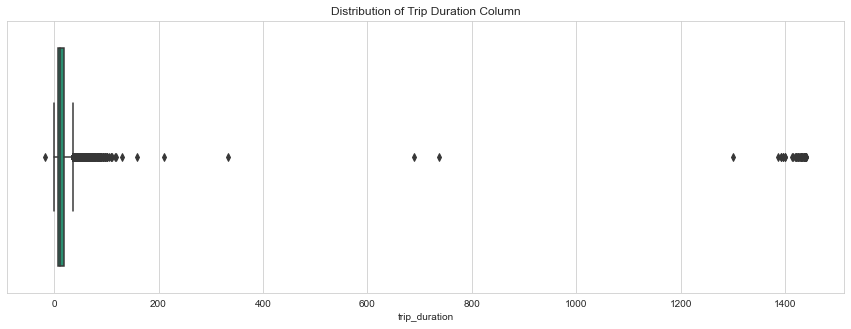

In [54]:
plt.figure(figsize = (15, 5))
sns.boxplot(data= df, x= "trip_duration", showfliers= True)
plt.title("Distribution of Trip Duration Column")
plt.show()


In [55]:
# imputations 
# passemger count imputation

df[['passenger_count']].value_counts()

passenger_count
1                  16117
2                   3305
5                   1143
3                    953
6                    693
4                    455
0                     33
dtype: int64

In [56]:
df.loc[df['passenger_count']==0,'passenger_count']=1

In [58]:
#rotecodeID imputation
df[['RatecodeID']].value_counts()


RatecodeID
1             22070
2               513
5                68
3                39
4                 8
99                1
dtype: int64

In [59]:
df.loc[df['RatecodeID']==99,'RatecodeID']=3

In [60]:
#extra imputation
df.loc[df["extra"] < 0, "extra"].count()

9

In [61]:
df.loc[df["extra"] < 0, "extra"] = 0

In [62]:
#mta_tax imputation
df.loc[df["mta_tax"] < 0, "mta_tax"].count()

13

In [63]:
df.loc[df["mta_tax"] < 0, "mta_tax"] = 0

In [64]:
#tip_amount imputation
df["tip_amount"].sort_values(ascending= False).head(5)


8476     200.00
6064      55.50
13861     51.64
12511     46.69
984       42.29
Name: tip_amount, dtype: float64

In [65]:
df.loc[df["tip_amount"] == 200, "tip_amount"] = 55.50

In [66]:
#improvement_surcharge imputation
df.loc[df["improvement_surcharge"] < 0, "improvement_surcharge"].count()


14

In [67]:
df.loc[df["improvement_surcharge"] < 0, "improvement_surcharge"] = 0


In [80]:
# Impute upper-limit values in specified columns based on their interquartile range.
'''Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                   Q3 + (x * IQR). Used to determine maximum threshold,
                  beyond which a point is considered an outlier
    The IQR is computed for each column in column_list and values exceeding
 the upper threshold for each column are imputed with the upper threshold value.
              '''

def impute_outliers(column_list, iqr_factor):
    
    for column in column_list:
        
        # Reassign minimum to zero
        
        df.loc[df[column] < 0, column] = 0
        
        # Calculate upper threshold
        
        Q3 = df[column].quantile(.75)
        Q1 = df[column].quantile(.25)
        iqr = Q3 - Q1
        upper_limit = Q3 + (iqr_factor * iqr)
        print(column)
        print("Q3:", round(Q3, 3))
        print("Upper threshold:", round(upper_limit, 3))
        
        # Reassign values > threshold to threshold
        
        df.loc[df[column] > upper_limit, column] = upper_limit
 

In [81]:
#trip_distance imputation
impute_outliers(["trip_distance"], 9)


trip_distance
Q3: 3.06
Upper threshold: 21.69


In [82]:
df["trip_distance"].describe()


count    22699.000000
mean         2.904191
std          3.598010
min          0.000000
25%          0.990000
50%          1.610000
75%          3.060000
max         21.690000
Name: trip_distance, dtype: float64

In [83]:
impute_outliers(["trip_duration"], 9)

trip_duration
Q3: 18.258
Upper threshold: 121.833


In [84]:
df["trip_duration"].describe()


count    22699.000000
mean        14.538892
std         12.546985
min          0.000000
25%          6.750000
50%         11.000000
75%         18.258333
max        121.833333
Name: trip_duration, dtype: float64

In [85]:
impute_outliers(["fare_amount"], 9)


fare_amount
Q3: 14.5
Upper threshold: 86.5


In [86]:
df["fare_amount"].describe()


count    22699.000000
mean        12.944139
std         10.795620
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         86.500000
Name: fare_amount, dtype: float64

In [87]:
impute_outliers(["total_amount"], 9)


total_amount
Q3: 17.8
Upper threshold: 99.25


In [88]:
df["total_amount"].describe()


count    22699.000000
mean        16.210212
std         13.337089
min          0.000000
25%          8.750000
50%         11.800000
75%         17.800000
max         99.250000
Name: total_amount, dtype: float64

In [89]:
#Feature Engineering
# Create `pickup_dropoff` column
df["pickup_dropoff"] = df["PULocationID"].astype("str") + " >> " + df["DOLocationID"].astype("str")
df["pickup_dropoff"].head(5)

0    100 >> 231
1     186 >> 43
2    262 >> 236
3     188 >> 97
4      4 >> 112
Name: pickup_dropoff, dtype: object

In [90]:
df["pickup_dropoff"].describe()


count          22699
unique          4172
top       264 >> 264
freq             277
Name: pickup_dropoff, dtype: object

In [91]:
#Create mean_distance column
grouped_pickup_dropoff = round(df.groupby(["pickup_dropoff"])[["trip_distance"]].mean(), 2)
grouped_pickup_dropoff.head(5)


,trip_distance
pickup_dropoff,
1 >> 1,2.43
10 >> 148,15.70
100 >> 1,16.89
100 >> 100,0.25
100 >> 107,1.18


In [92]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped_pickup_dropoff.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict["trip_distance"]


In [94]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df["mean_distance"] = df["pickup_dropoff"]

# 2. Map `grouped_dict` to the `mean_distance` column
df["mean_distance"] = df["mean_distance"].map(grouped_dict)



In [95]:
# Confirm that it worked
df["mean_distance"].head(5)


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: mean_distance, dtype: object

In [96]:
#Create mean_duration column
grouped_pickup_dropoff = round(df.groupby(["pickup_dropoff"])[["trip_duration"]].mean(), 2)
grouped_pickup_dropoff.head(5)


,trip_duration
pickup_dropoff,
1 >> 1,0.00
10 >> 148,69.00
100 >> 1,48.00
100 >> 100,3.12
100 >> 107,11.37


In [97]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped_pickup_dropoff.to_dict()
# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict["trip_duration"]


In [98]:
# 1. Create a mean_duration column that is a copy of the pickup_dropoff helper column
df["mean_duration"] = df["pickup_dropoff"]
# 2. Map `grouped_dict` to the `mean_duration` column
df["mean_duration"] = df["mean_duration"].map(grouped_dict)
# Confirm that it worked
df["mean_duration"].head(5)


0    22.88
1    24.29
2     7.26
3    31.00
4    14.36
Name: mean_duration, dtype: float64

In [99]:
#Create day & month columns
# Create 'day' col
df["day"] = df["tpep_pickup_datetime"].dt.day_name().str.lower()
# Create 'month' col
df["month"] = df["tpep_pickup_datetime"].dt.month_name().str.lower()


In [100]:
# Create 'rush_hour' col
df["rush_hour"] = df["tpep_pickup_datetime"].dt.hour
# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df["day"].isin(["saturday", "sunday"]), "rush_hour"] = 0
df["rush_hour"].head(5)

0     0
1    14
2     7
3     0
4     0
Name: rush_hour, dtype: int64

In [104]:
def rush_hourizer(hour):
    if 6 <= hour <= 10:
        val = 1
    elif 16 <= hour <= 20:
        val = 1
    else:
        val = 0
    return val

df["rush_hour"] = df["rush_hour"].apply(rush_hourizer)
df["rush_hour"].head(5)


0    0
1    0
2    1
3    0
4    0
Name: rush_hour, dtype: int64

In [105]:
#Ordering columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [109]:
df1 = df[["VendorID", "tpep_pickup_datetime", "tpep_dropoff_datetime", "day", "month", "rush_hour",\
 "passenger_count", "trip_distance", "trip_duration","RatecodeID", "store_and_fwd_flag",\
 "PULocationID", "DOLocationID", "pickup_dropoff", "mean_distance", "mean_duration", "payment_type",\
 "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", 
"total_amount"]]
df1.shape


(22699, 24)

In [110]:
#Data visualizations for tip_amount
#Tips by Vendor
df1["VendorID"].value_counts(normalize= True)

2    0.556236
1    0.443764
Name: VendorID, dtype: float64

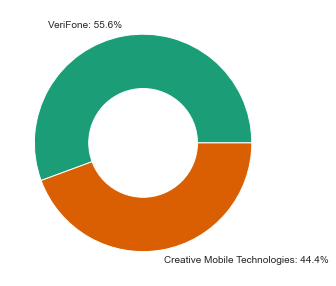

In [111]:
plt.figure(figsize= (15, 5))
plt.pie(df1["VendorID"].value_counts(), labels= ["VeriFone: 55.6%", "Creative Mobile Technologies: 44.4%"])
my_circle = plt.Circle( (0,0), 0.5, color= 'white')
p= plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

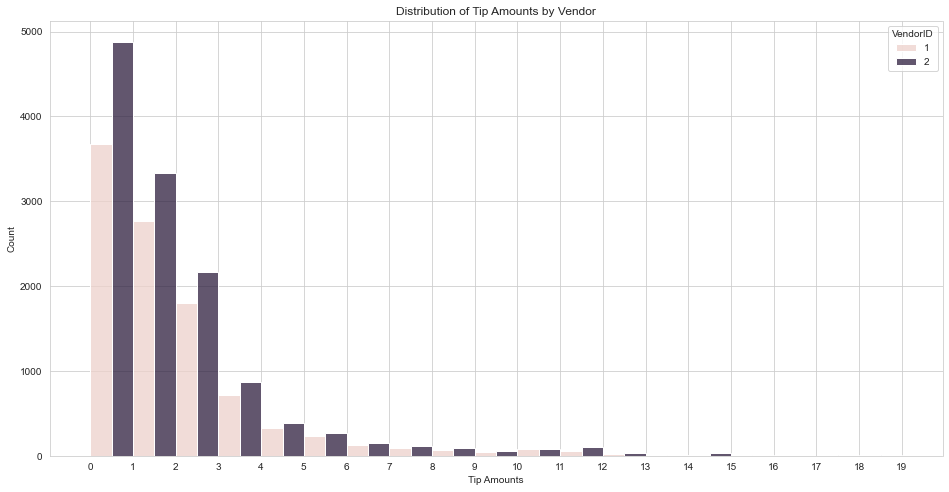

In [112]:
plt.figure(figsize = (16, 8))
ax= sns.histplot(data= df1, x= "tip_amount", bins= range(0, 20, 1), hue= "VendorID", multiple= "dodge")
ax.set_xticks(range(0, 20, 1))
ax.set_xticklabels(range(0, 20, 1))
plt.xlabel("Tip Amounts")
plt.title("Distribution of Tip Amounts by Vendor")
plt.show()


In [113]:
df_vendor = df1.groupby(["VendorID"])[["tip_amount", "total_amount"]].agg({"sum", "mean"})
df_vendor

tip_amount           total_amount           
                sum      mean          sum       mean
VendorID                                             
1          18362.12  1.822905    162838.95  16.165884
2          23163.78  1.834610    205116.65  16.245577

In [114]:
round(df1["passenger_count"].value_counts(normalize= True), 3) * 100


1    71.1
2    14.6
5     5.0
3     4.2
6     3.1
4     2.0
Name: passenger_count, dtype: float64

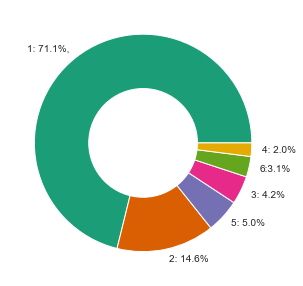

In [117]:
plt.figure(figsize= (15, 5))
plt.pie(df1["passenger_count"].value_counts(), labels=["1: 71.1%,", "2: 14.6%", "5: 5.0%", "3: 4.2%",
"6:3.1%", "4: 2.0%"])
                                                        
my_circle = plt.Circle( (0,0), 0.5, color= 'white')
p= plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In [118]:
mean_tips_by_pass = df1.groupby(["passenger_count"])[["tip_amount"]].mean().reset_index().rename(columns=
{"tip_amount": "average_tip"})
mean_tips_by_pass

,passenger_count,average_tip
0,1,1.840559
1,2,1.856378
2,3,1.716768
3,4,1.530264
4,5,1.873185
5,6,1.720260


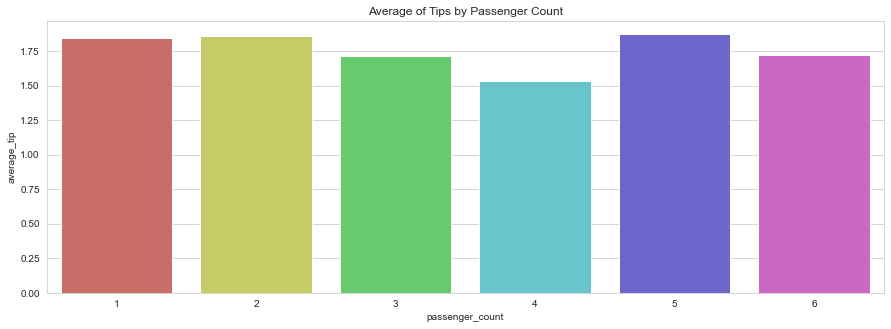

In [119]:
plt.figure(figsize = (15, 5))
sns.barplot(data= mean_tips_by_pass, x= "passenger_count", y= "average_tip", palette= "hls")
plt.title("Average of Tips by Passenger Count")
plt.show()


In [120]:
round(df1["payment_type"].value_counts(normalize= True), 3) * 100


1    67.2
2    32.0
3     0.5
4     0.2
Name: payment_type, dtype: float64

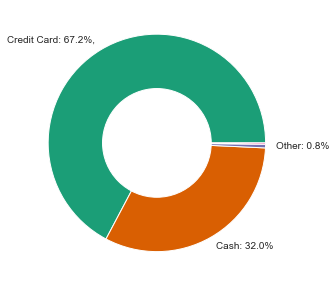

In [121]:
plt.figure(figsize= (15, 5))
plt.pie(df1["payment_type"].value_counts(), labels= ["Credit Card: 67.2%,", "Cash: 32.0%", "Other: 0.8%", ""])
my_circle = plt.Circle( (0,0), 0.5, color= 'white')
p= plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In [122]:
mean_tips_by_pay = df1.groupby(["payment_type"])[["tip_amount"]].mean().reset_index().rename(columns=
{"tip_amount": "average_tip"})
mean_tips_by_pay


,payment_type,average_tip
0,1,2.720334
1,2,0.000000
2,3,0.000000
3,4,0.000000


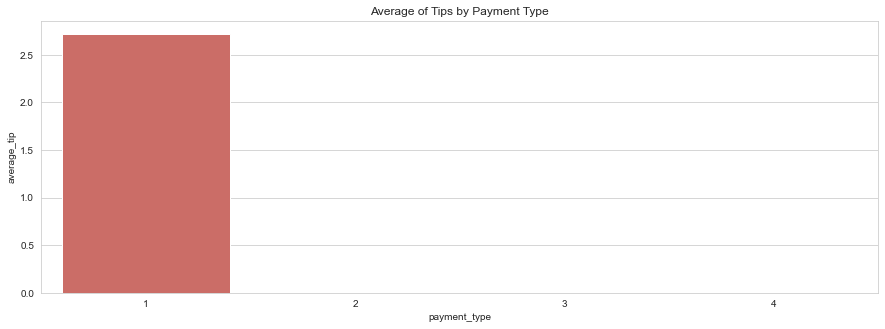

In [123]:
plt.figure(figsize = (15, 5))
sns.barplot(data= mean_tips_by_pay, x= "payment_type", y= "average_tip", palette= "hls")
plt.title("Average of Tips by Payment Type")
plt.show()


In [124]:
#Conduct an A/B Test with a two-sample t-test
df1.groupby(["payment_type"])["fare_amount"].agg({"mean", "median"})


,median,mean
payment_type,,
1,9.5,13.330766
2,9.0,12.141302
3,7.0,12.367934
4,8.5,12.989130


In [125]:
credit_card = df1[df1["payment_type"] == 1]["fare_amount"]
cash = df1[df1["payment_type"] == 2]["fare_amount"]
print(len(credit_card))
print(len(cash))


15265
7267


In [126]:
stats.ttest_ind(a= credit_card, b= cash, equal_var= False)


Ttest_indResult(statistic=7.928029528935512, pvalue=2.381707989138683e-15)

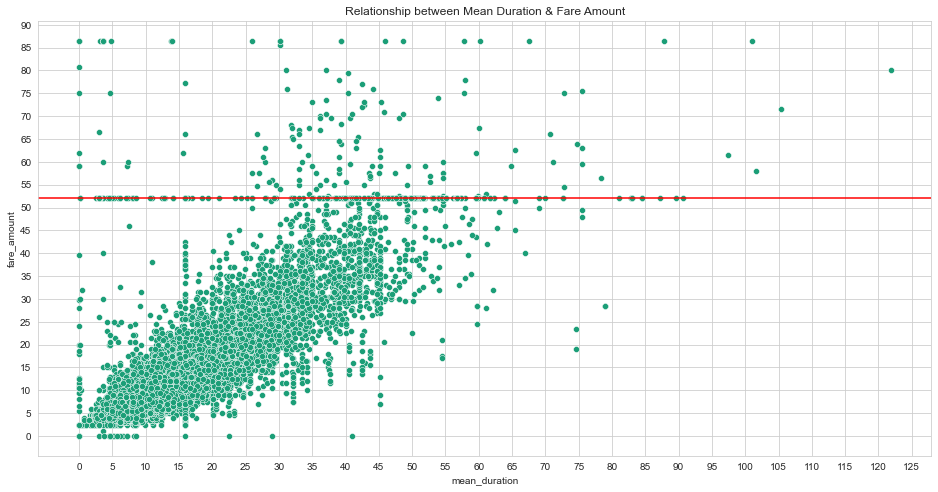

In [127]:
plt.figure(figsize= (16, 8))
sns.scatterplot(data= df1, x= "mean_duration", y= "fare_amount")
plt.axhline(52, color= "red")
plt.xticks(range(0, 126, 5))
plt.yticks(range(0, 91, 5))
plt.title("Relationship between Mean Duration & Fare Amount")
plt.show()

In [129]:
df1[df1["fare_amount"] > 50]["fare_amount"].value_counts().head(3)


52.0    514
86.5     23
50.5      9
Name: fare_amount, dtype: int64

In [130]:
# Set pandas to display all columns
pd.set_option("display.max_columns", None)
df1[df1["fare_amount"] == 52].head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,day,month,rush_hour,passenger_count,trip_distance,trip_duration,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,pickup_dropoff,mean_distance,mean_duration,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
11,2,2017-03-05 19:15:00,2017-03-05 19:52:00,sunday,march,0,2,18.90,37.000000,2,N,236,132,236 >> 132,NaN,46.10,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92
110,1,2017-06-03 14:24:00,2017-06-03 15:31:00,saturday,june,0,1,18.00,67.000000,2,N,132,163,132 >> 163,NaN,53.07,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80
161,2,2017-11-11 20:16:00,2017-11-11 20:17:00,saturday,november,0,1,0.23,1.000000,2,N,132,132,132 >> 132,NaN,3.02,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80
247,2,2017-12-06 23:37:00,2017-12-07 00:06:00,wednesday,december,0,1,18.93,29.000000,2,N,132,79,132 >> 79,NaN,47.16,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80
379,2,2017-09-24 23:45:45,2017-09-25 00:15:14,sunday,september,0,1,17.99,29.483333,2,N,132,234,132 >> 234,NaN,49.78,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
388,1,2017-02-28 18:30:05,2017-02-28 19:09:55,tuesday,february,1,1,18.40,39.833333,2,N,132,48,132 >> 48,NaN,59.85,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84
406,2,2017-06-05 12:51:00,2017-06-05 13:07:00,monday,june,0,1,4.73,16.000000,2,N,228,88,228 >> 88,NaN,16.00,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56
449,2,2017-08-03 22:47:00,2017-08-03 23:32:00,thursday,august,0,2,18.21,45.000000,2,N,132,48,132 >> 48,NaN,59.85,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56
468,2,2017-09-26 13:48:26,2017-09-26 14:31:17,tuesday,september,0,1,17.27,42.850000,2,N,186,132,186 >> 132,NaN,42.79,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56
520,2,2017-04-23 21:34:48,2017-04-23 22:46:23,sunday,april,0,6,18.34,71.583333,2,N,132,148,132 >> 148,NaN,46.37,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80


In [131]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               22699 non-null  int64         
 1   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 3   day                    22699 non-null  object        
 4   month                  22699 non-null  object        
 5   rush_hour              22699 non-null  int64         
 6   passenger_count        22699 non-null  int64         
 7   trip_distance          22699 non-null  float64       
 8   trip_duration          22699 non-null  float64       
 9   RatecodeID             22699 non-null  int64         
 10  store_and_fwd_flag     22699 non-null  object        
 11  PULocationID           22699 non-null  int64         
 12  DOLocationID           22699 non-null  int64         
 13  p

In [132]:
df2 = df1.copy()
df2 = df2.drop(["tpep_pickup_datetime", "tpep_dropoff_datetime", "day", "month", "trip_distance", 
"trip_duration",\
 "store_and_fwd_flag", "PULocationID", "DOLocationID", "pickup_dropoff", "payment_type", 
"RatecodeID",\
 "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount"], 
axis= 1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   rush_hour        22699 non-null  int64  
 2   passenger_count  22699 non-null  int64  
 3   mean_distance    0 non-null      object 
 4   mean_duration    22699 non-null  float64
 5   fare_amount      22699 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.0+ MB


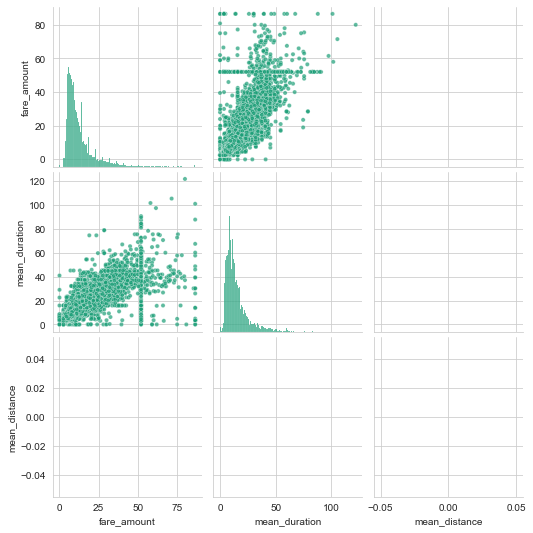

In [134]:
sns.pairplot(data= df2[["fare_amount", "mean_duration", "mean_distance"]], plot_kws= {"alpha": 0.7,
                                                                                      
"size":0.7})
plt.show()

In [135]:
# Correlation matrix to help determine most correlated variables
df2.corr(method= "pearson")


,VendorID,rush_hour,passenger_count,mean_duration,fare_amount
VendorID,1.000000,-0.000752,0.265464,0.002441,0.001379
rush_hour,-0.000752,1.000000,-0.024259,-0.026921,-0.025329
passenger_count,0.265464,-0.024259,1.000000,0.015731,0.015012
mean_duration,0.002441,-0.026921,0.015731,1.000000,0.840942
fare_amount,0.001379,-0.025329,0.015012,0.840942,1.000000


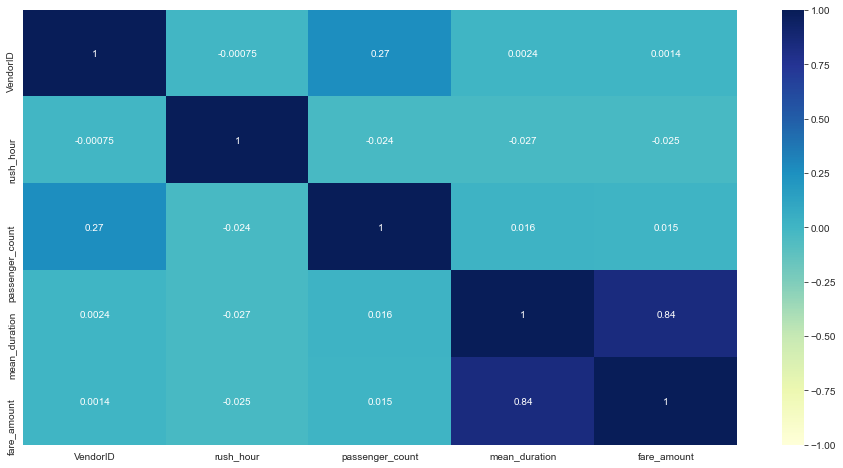

In [136]:
# Create correlation heatmap
plt.figure(figsize= (16, 8))
sns.heatmap(data= df2.corr(method= "pearson"), vmin= -1, vmax= 1, annot= True, cmap= "YlGnBu")
plt.show()


In [137]:
#paCe: Construct Stage
#Step 4. Model Building
#Split data into outcome variable and features
# Remove the target column from the features
X = df2.drop(columns='fare_amount')
# Set y variable
y = df2[["fare_amount"]]
# Display first few rows
X.head(3)

,VendorID,rush_hour,passenger_count,mean_distance,mean_duration
0,2,0,6,NaN,22.88
1,1,0,1,NaN,24.29
2,1,1,1,NaN,7.26


In [138]:
#Dummy encode categorical vendorID
# Convert VendorID to string
X["VendorID"] = X["VendorID"].astype("str")
# Get dummies
X = pd.get_dummies(X, drop_first= False)
X.head(3)


,rush_hour,passenger_count,mean_duration,VendorID_1,VendorID_2
0,0,6,22.88,0,1
1,0,1,24.29,1,0
2,1,1,7.26,1,0


In [140]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

#Modelling Approach [A]: Multiple Linear Regression

#Standardize the data

# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print("X_train_scaled:\n", X_train_scaled)


X_train_scaled:
 [[-0.77153979 -0.50468931  0.16609815 -0.89286563  0.89286563]
 [ 1.29610943 -0.50468931 -0.70336919 -0.89286563  0.89286563]
 [-0.77153979  0.27243722 -0.57192676  1.11998936 -1.11998936]
 ...
 [-0.77153979 -0.50468931 -0.66637058  1.11998936 -1.11998936]
 [ 1.29610943 -0.50468931 -0.84844269  1.11998936 -1.11998936]
 [-0.77153979  1.82669027  1.1173519  -0.89286563  0.89286563]]


In [144]:
#Fit the model
# Fit your model to the training data
mlr = LinearRegression(n_jobs= -1)
mlr.fit(X_train_scaled, y_train)
LinearRegression(n_jobs=-1)
#Evaluate the model
def evaluate_regressor(actual, predicted):
 print(f"R^2: {round(r2_score(actual, predicted), 2)}")
 print(f"MAE: {round(mean_absolute_error(actual, predicted), 2)}")
 print(f"MSE: {round(mean_squared_error(actual, predicted), 2)}")
 print(f"RMSE: {round(np.sqrt(mean_squared_error(actual, predicted)), 2)}")
y_pred_train_mlr = mlr.predict(X_train_scaled)
evaluate_regressor(y_train, y_pred_train_mlr)


R^2: 0.7
MAE: 3.19
MSE: 35.01
RMSE: 5.92


In [145]:
X_test_scaled = scaler.transform(X_test)
y_pred_test_mlr = mlr.predict(X_test_scaled)
evaluate_regressor(y_test, y_pred_test_mlr)


R^2: 0.73
MAE: 3.14
MSE: 30.6
RMSE: 5.53


In [147]:
#Coefficients for multiple linear regression
print("Coefficients:\n", mlr.coef_)


Coefficients:
 [[-0.04903668  0.02401547  9.06495823  0.02222505 -0.02222505]]


In [148]:
coefficients = round(pd.DataFrame(data= mlr.coef_, columns= X.columns) * 100, 4)
coefficients


,rush_hour,passenger_count,mean_duration,VendorID_1,VendorID_2
0,-4.9037,2.4015,906.4958,2.2225,-2.2225


In [150]:
print(X_train['mean_duration'].std())
print(2.4686 / X_train['mean_duration'].std())


10.270938827844677
0.24034803841958305


In [152]:
#Modelling Approach [B]: Random Forest Regressor
ranfor_reg = RandomForestRegressor(random_state= 17)
cv_params = {"max_depth": [4, 6, 8, 10], "min_samples_leaf": [1, 2, 3, 4], "n_estimators": [100, 150, 200, 
250]}
scoring = ["explained_variance", "neg_mean_absolute_error", "neg_mean_squared_error", 
"neg_root_mean_squared_error"]
ranfor_cv = GridSearchCV(estimator= ranfor_reg, param_grid= cv_params, scoring= scoring, cv= 5, refit=
"explained_variance", n_jobs= -1, verbose= 2)
%%time
ranfor_cv.fit(X_train, y_train)


NameError: name 'GridSearchCV' is not defined